### Description
* Please complete all the exercises in this homework in order. The main objective of the homework is to walk you through a toy problem for regression.
* The data for this homework is available in the `.db` file provided inside this folder. Please use this file to extract the data using SQL.
* Complete the exercises by filling in each code cell below. No need to create a separate file. Simply add your code to each cell and then run it.
* Once you complete your homework, please upload the notebook to your forked repo.
* Deadline: 15 Nov 2021 @ 23.59.59 EEST

#### Step 1 - Connect to the SQLite database using sqlite3

In [1]:
# Your code goes here
import sqlite3
conn = sqlite3.connect("homework4.db")

#### Step 2 - Load the data using pandas.read_sql()
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_sql.html

In [2]:
# Your code goes here
import pandas as pd
df = pd.read_sql("select * from homework4", conn)

In [3]:
df

id       age       sex       bmi        bp        s1        s2  \
0      1  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821   
1      2 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163   
2      3  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194   
3      4 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991   
4      5  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596   
..   ...       ...       ...       ...       ...       ...       ...   
879  880  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566   
880  881 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165   
881  882  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840   
882  883 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283   
883  884 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809   

           s3        s4        s5        s6  target  
0   -0.043401 -0.002592  0.019908 -0.017646   151.0  
1    0.074412 -0.039493 -0.068330 -0.092204    75.0  
2   -0.032356 -0.002592  0.002864 -0.025930   141.0  
3   -0.036038  0.034309  0.022692 -0.009362   206.0  
4    0.008142 -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...       ...     ...  
879 -0.028674 -0.002592  0.031193  0.007207   178.0  
880 -0.028674  0.034309 -0.018118  0.044485   104.0  
881 -0.024993 -0.011080 -0.046879  0.015491   132.0  
882 -0.028674  0.026560  0.044528 -0.025930   220.0  
883  0.173816 -0.039493 -0.004220  0.003064    57.0  

[884 rows x 12 columns]

#### Step 3 - Explore the data
Before building a model, check out your data and ensure that it is clean. Things you should be careful about include:

* null or missing values
* unmatched data types
* anomalies (very large or very small values)
* duplicated values

Please note that your data set is a modified version of the data available here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [4]:
# Your code goes here
run = True  
if run:
    ids = df["id"]
    df = df.set_index(ids)
    df.drop(columns=['id'], axis=1, inplace=True)
    df.head()

Please provide a description of your findings below:

* Finding 1:

#### Step 4 - Clean your data

* Remove null or missing values
* Clean data types
* Remove outliers

In [5]:
# Your code goes here
print(f"Initial number of obs: {len(df)}")
df = df.drop_duplicates()
print(f"Removed duplicates number of obs: {len(df)}")

Initial number of obs: 884
Removed duplicates number of obs: 442


In [6]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -3.634285e-16  1.308343e-16 -8.045349e-16  1.281655e-16 -8.835316e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123996e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665645e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670611e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564384e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320442e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   1.327024e-16 -4.574646e-16  3.777301e-16 -3.830854e-16 -3.412882e-16   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260974e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324879e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947634e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243323e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335990e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [8]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3 - Q1
IQR

age         0.075375
sex         0.095322
bmi         0.065477
bp          0.072300
s1          0.062606
s2          0.060203
s3          0.064429
s4          0.073802
s5          0.065682
s6          0.061096
target    124.500000
dtype: float64

In [9]:
upper_limit = Q3 + 1.5 * IQR
upper_limit

age         0.151139
sex         0.193663
bmi         0.129464
bp          0.144094
s1          0.122267
s2          0.120149
s3          0.125954
s4          0.145012
s5          0.130956
s6          0.119561
target    398.250000
dtype: float64

In [10]:
lower_limit = Q1 - 1.5 * IQR
lower_limit

age       -0.150362
sex       -0.187624
bmi       -0.132445
bp        -0.145107
s1        -0.128157
s2        -0.120663
s3        -0.131760
s4        -0.150197
s5        -0.131772
s6        -0.124823
target   -99.750000
dtype: float64

In [11]:
standard_deviation = df.std()
mean = df.mean()

In [12]:
standard_deviation

age        0.047619
sex        0.047619
bmi        0.047619
bp         0.047619
s1         0.047619
s2         0.047619
s3         0.047619
s4         0.047619
s5         0.047619
s6         0.047619
target    77.093005
dtype: float64

In [13]:
mean

age      -3.634285e-16
sex       1.308343e-16
bmi      -8.045349e-16
bp        1.281655e-16
s1       -8.835316e-17
s2        1.327024e-16
s3       -4.574646e-16
s4        3.777301e-16
s5       -3.830854e-16
s6       -3.412882e-16
target    1.521335e+02
dtype: float64

In [14]:
upper_limit_std = mean + 3 * standard_deviation
upper_limit_std

age         0.142857
sex         0.142857
bmi         0.142857
bp          0.142857
s1          0.142857
s2          0.142857
s3          0.142857
s4          0.142857
s5          0.142857
s6          0.142857
target    383.412498
dtype: float64

In [15]:
lower_limit_std = mean - 3 * standard_deviation
lower_limit_std

age       -0.142857
sex       -0.142857
bmi       -0.142857
bp        -0.142857
s1        -0.142857
s2        -0.142857
s3        -0.142857
s4        -0.142857
s5        -0.142857
s6        -0.142857
target   -79.145529
dtype: float64

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

for i in df.columns:
    fig = px.box(df[i], y=i)
    fig.show()

In [21]:
df = df.drop(df.index[df["bmi"]>= 0.128])
df

age       sex       bmi        bp        s1        s2        s3  \
id                                                                          
1    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
3    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
4   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
5    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
438  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
439 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
440  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
441 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
442 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
id                                         
1   -0.002592  0.019908 -0.017646   151.0  
2   -0.039493 -0.068330 -0.092204    75.0  
3   -0.002592  0.002864 -0.025930   141.0  
4    0.034309  0.022692 -0.009362   206.0  
5   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
438 -0.002592  0.031193  0.007207   178.0  
439  0.034309 -0.018118  0.044485   104.0  
440 -0.011080 -0.046879  0.015491   132.0  
441  0.026560  0.044528 -0.025930   220.0  
442 -0.039493 -0.004220  0.003064    57.0  

[438 rows x 11 columns]

In [22]:
df = df.drop(df.index[df["s1"]>= 0.119])
df

age       sex       bmi        bp        s1        s2        s3  \
id                                                                          
1    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
3    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
4   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
5    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
438  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
439 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
440  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
441 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
442 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
id                                         
1   -0.002592  0.019908 -0.017646   151.0  
2   -0.039493 -0.068330 -0.092204    75.0  
3   -0.002592  0.002864 -0.025930   141.0  
4    0.034309  0.022692 -0.009362   206.0  
5   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
438 -0.002592  0.031193  0.007207   178.0  
439  0.034309 -0.018118  0.044485   104.0  
440 -0.011080 -0.046879  0.015491   132.0  
441  0.026560  0.044528 -0.025930   220.0  
442 -0.039493 -0.004220  0.003064    57.0  

[429 rows x 11 columns]

In [23]:
df = df.drop(df.index[df["s2"]>= 0.117])
df

age       sex       bmi        bp        s1        s2        s3  \
id                                                                          
1    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
3    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
4   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
5    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
438  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
439 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
440  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
441 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
442 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  target  
id                                         
1   -0.002592  0.019908 -0.017646   151.0  
2   -0.039493 -0.068330 -0.092204    75.0  
3   -0.002592  0.002864 -0.025930   141.0  
4    0.034309  0.022692 -0.009362   206.0  
5   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
438 -0.002592  0.031193  0.007207   178.0  
439  0.034309 -0.018118  0.044485   104.0  
440 -0.011080 -0.046879  0.015491   132.0  
441  0.026560  0.044528 -0.025930   220.0  
442 -0.039493 -0.004220  0.003064    57.0  

[428 rows x 11 columns]

In [24]:
df = df.drop(df.index[df["s3"]>= 0.122])
df = df.drop(df.index[df["s4"]>= 0.114])
df = df.drop(df.index[df["s6"]>= 0.119])
df = df.drop(df.index[df["s6"]<= -0.104])
df

age       sex       bmi        bp        s1        s2        s3  \
id                                                                          
1    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
2   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
3    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
4   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
5    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437 -0.056370 -0.044642 -0.074108 -0.050428 -0.024960 -0.047034  0.092820   
438  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
439 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
440  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
441 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   

           s4        s5        s6  target  
id                                         
1   -0.002592  0.019908 -0.017646   151.0  
2   -0.039493 -0.068330 -0.092204    75.0  
3   -0.002592  0.002864 -0.025930   141.0  
4    0.034309  0.022692 -0.009362   206.0  
5   -0.002592 -0.031991 -0.046641   135.0  
..        ...       ...       ...     ...  
437 -0.076395 -0.061177 -0.046641    48.0  
438 -0.002592  0.031193  0.007207   178.0  
439  0.034309 -0.018118  0.044485   104.0  
440 -0.011080 -0.046879  0.015491   132.0  
441  0.026560  0.044528 -0.025930   220.0  

[402 rows x 11 columns]

#### Step 5 - Split your dataset into a training and test data set using scikit-learn's train_test_split() method

In [25]:
# Your code goes here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df["target"]
df.drop(columns=["target"], axis=1, inplace=True)
X = df

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Step 6 - Develop a class that accepts X, y on the constructor and implements the functionality highlighted below. 

* The constructor takes in a matrix, X, with the observations (independent variables) and the target, y, (dependent variable)
* Has a method fit where it trains THREE different regressors
* Reports the average of all predictors as the final target value 
* Can compute the MSE and MAE for any prediction
* Has a method predict that can be used to predict the target variable for unseen data. The final prediction is an
average off the values predicted by the regressors
* (Optional) Extend the class to use an arbitrary number of regressors 

In [28]:
# Implement the methods below + add any methods you think are necessary to create this Regressor class

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


class Regressor:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
        self.reg_c = {
            "reg1": None,
            "reg2": None,
            "reg3": None
        }
    
    def fit(self):
        reg1 = LinearRegression()
        reg1 = reg1.fit(self.X, self.y)
        
        reg2 = RandomForestRegressor()
        reg2 = reg2.fit(self.X, self.y)

        reg3 = xgb.XGBRegressor()
        reg3 = reg3.fit(self.X, self.y)
        
        self.reg_c["reg1"] = reg1
        self.reg_c["reg2"] = reg2
        self.reg_c["reg3"] = reg3
    
    def predict(self, X):
        yp1 = self.reg_c["reg1"].predict(X)
        yp2 = self.reg_c["reg2"].predict(X)
        yp3 = self.reg_c["reg3"].predict(X)
        
        return (yp1 + yp2 + yp3)/3
    
    def mse(self):
        
        mse_c = mean_squared_error(y_true = self.y, y_pred = self.predict(self.X))
        
        return mse_c
    
    def mae(self):
        mae_c = mean_absolute_error(y_true = self.y, y_pred = self.predict(self.X))
        
        return mae_c

#### Step 7 - Train a Regressor on the data provided using the class you created

In [29]:
# Your code goes here
import numpy as np
y_train = np.ravel(y_train, order='C')
reg = Regressor(X_train, y_train)
reg.fit()
yp_train = reg.predict(X_train)

#### Step 8 - Validate the regressors MAE and MSE on the training set

In [30]:
# Your code goes here
mse_train = reg.mse()
mae_train = reg.mae()
print(f"MSE value: {mse_train}. MAE value: {mae_train}")

MSE value: 620.8730193032733. MAE value: 20.321559292070177


#### Step 9 - Validate the regressor's MAE and MSE on the test set

In [31]:
# Your code goes here
y_test = np.ravel(y_test, order='C')
reg2 = Regressor(X_test, y_test)
reg2.fit()
yp_test = reg.predict(X_test)
mse_test = reg2.mse()
mae_test = reg2.mae()
print(f"MSE value: {mse_test}. MAE value: {mae_test}")

MSE value: 480.69937999575876. MAE value: 17.702797878504924


#### Step 10 - What conclusions can you draw from the MSE and MAE? 
* Is your model accurately predicting the target?
* Do you think you are overfitting?
* Do you think your model is biased?
* What could you do to improve your regressor's predictive power?

In [ ]:
# Your code goes here

#### Step 11 - Visualise your data (optional)

Your data is multi-dimensional. Can you think of a way to visualise the data and the regressor results? 

In [32]:
# Your code goes here
r = LinearRegression()
r = r.fit(X_train, y_train)
y_train_pred = r.predict(X_train)
y_test_pred = r.predict(X_test)

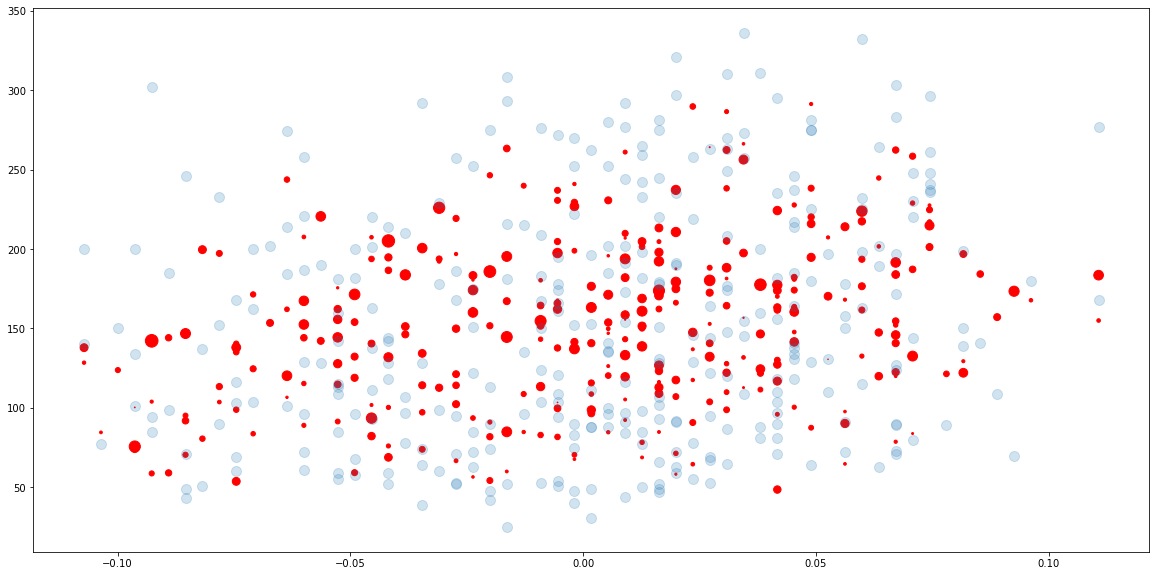

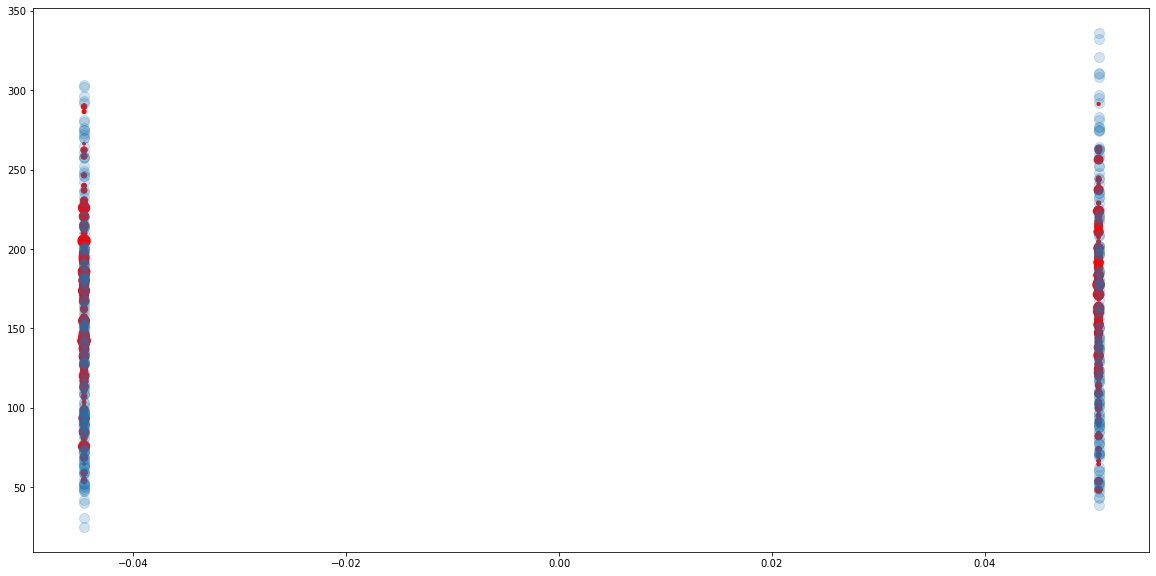

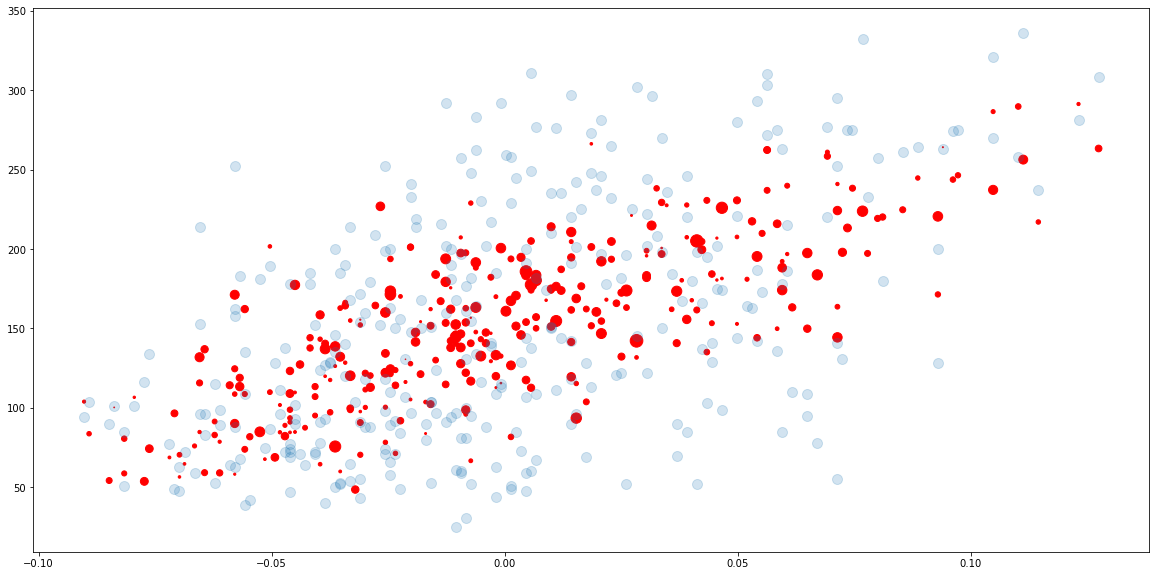

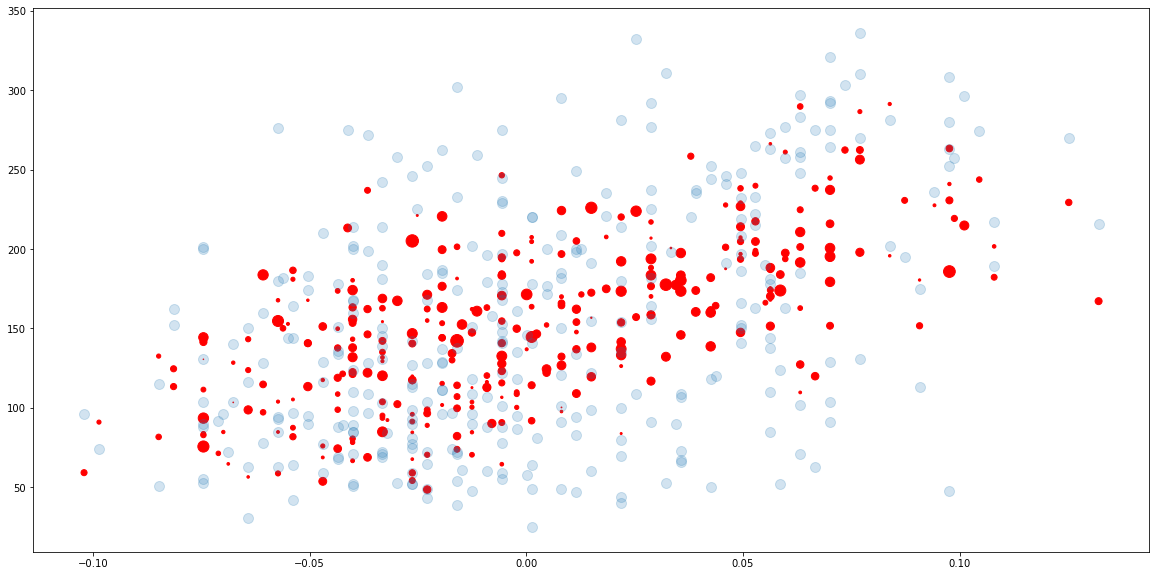

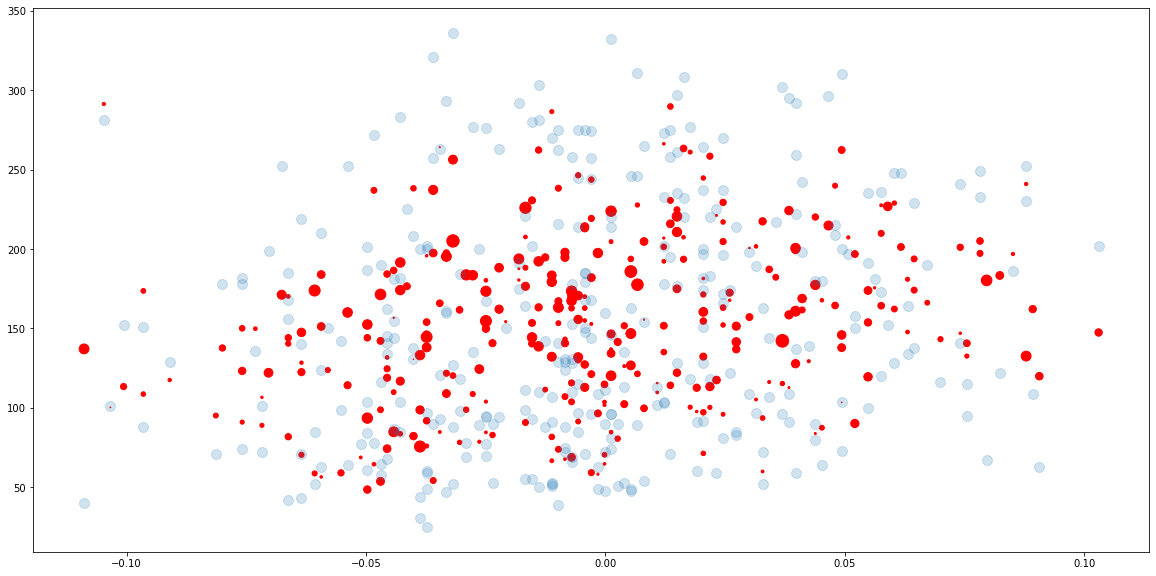

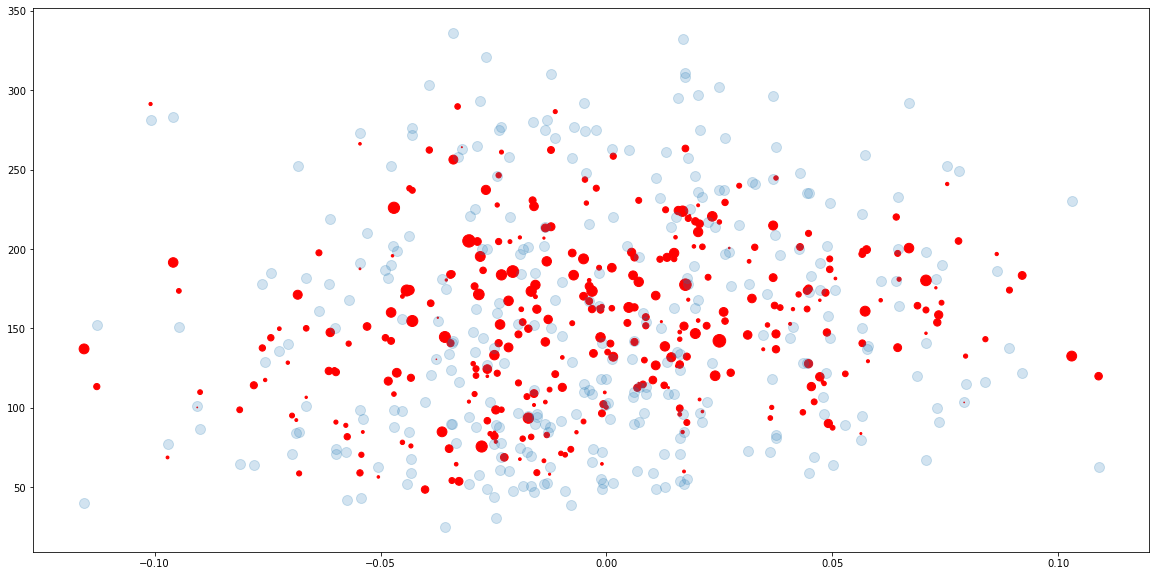

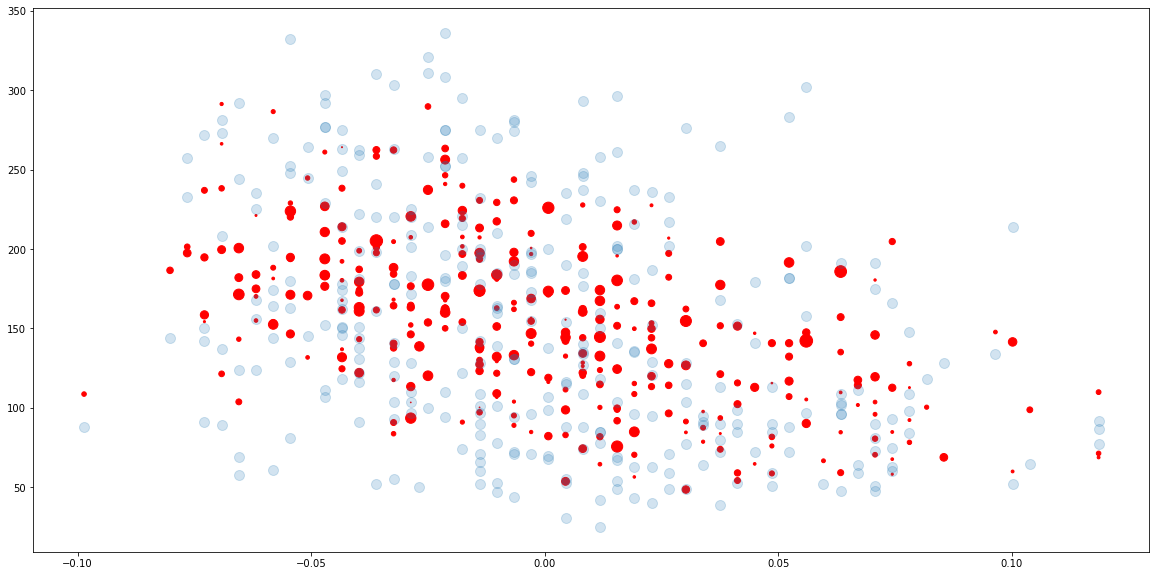

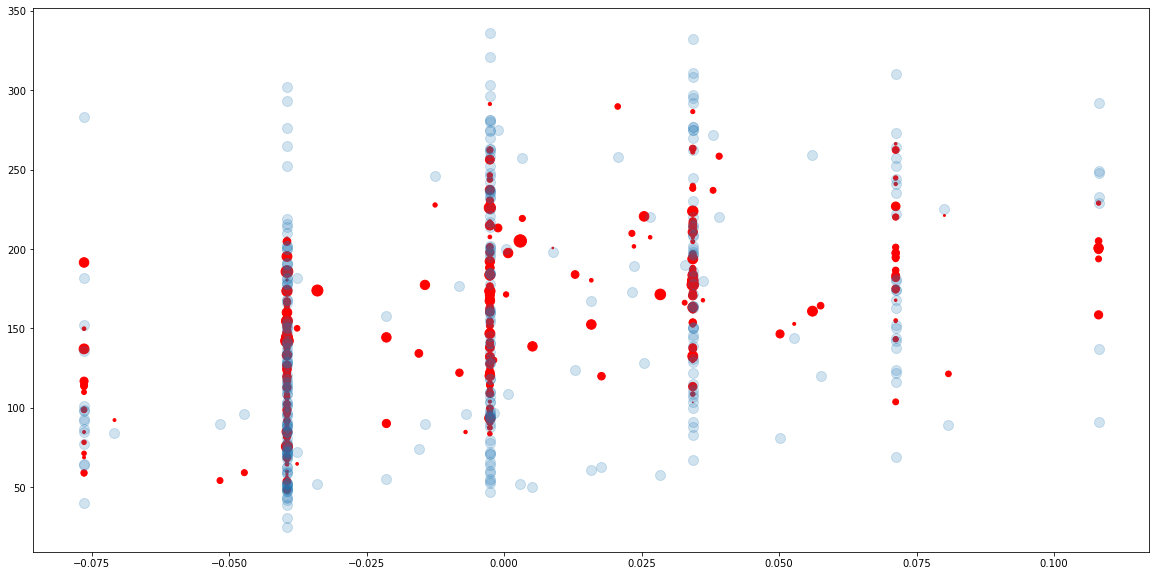

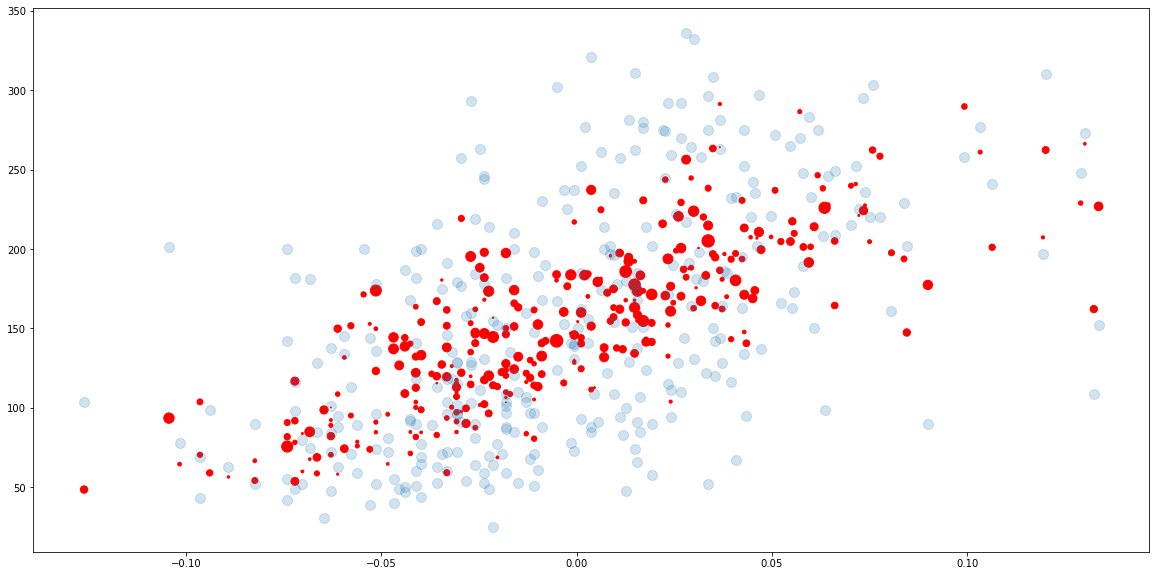

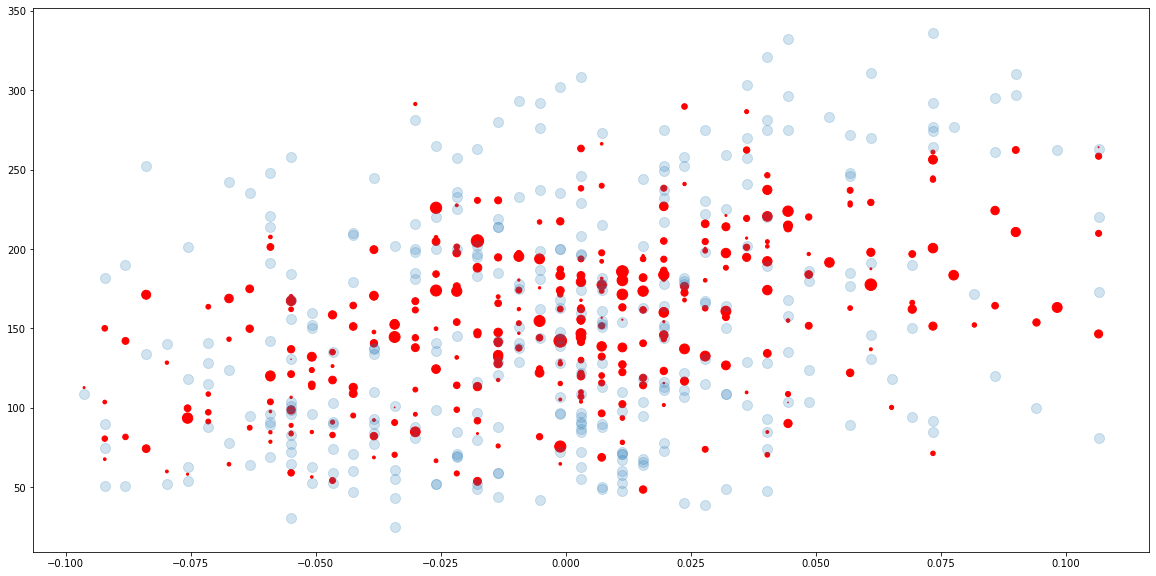

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline 

n_axis = X_train.shape[1]

# train plots 
import numpy as np
columns = df.columns
# _, axs = plt.subplots(n_axis, figsize=(15, 10))
for axid in range(n_axis):
    _ = plt.figure(figsize=(20, 10))
    plt.scatter(X_train[columns[axid]], y_train_pred, s=np.abs(y_train - y_train_pred), c='r')
    plt.scatter(X_train[columns[axid]], y_train, s=100, alpha=0.2)
    # plt.scatter(X_train[columns[axid]], , alpha=0.5, c='g')
    # axs[axid].scatter(X_train[columns[axid]], y_train_pred, c='r')
    # axs[axid].scatter(X_train[columns[axid]], y_train, alpha=0.2)
    plt.show()
# plt.show()

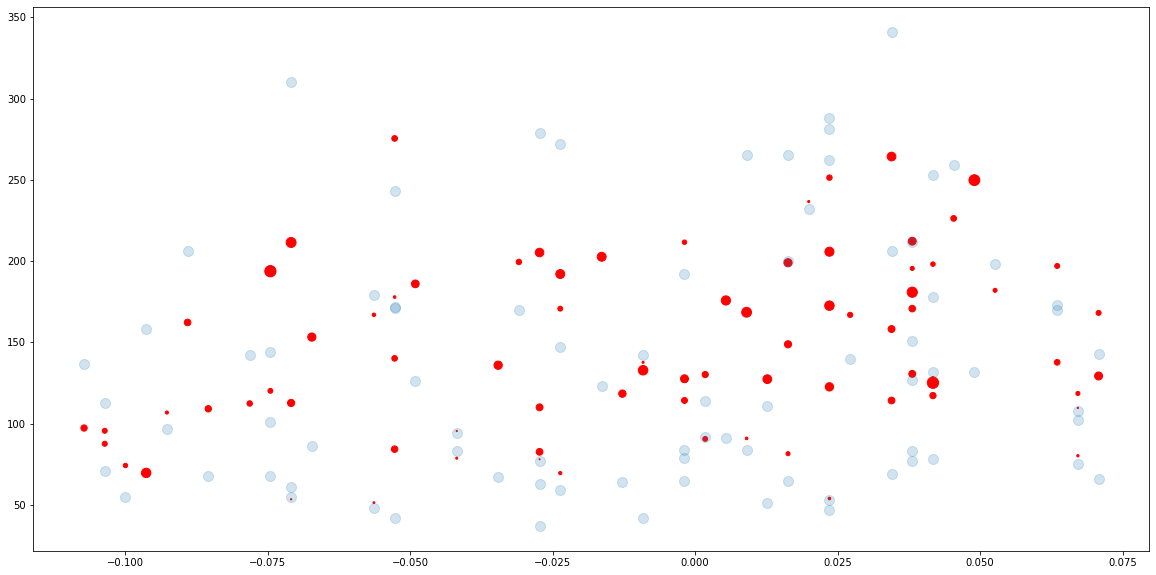

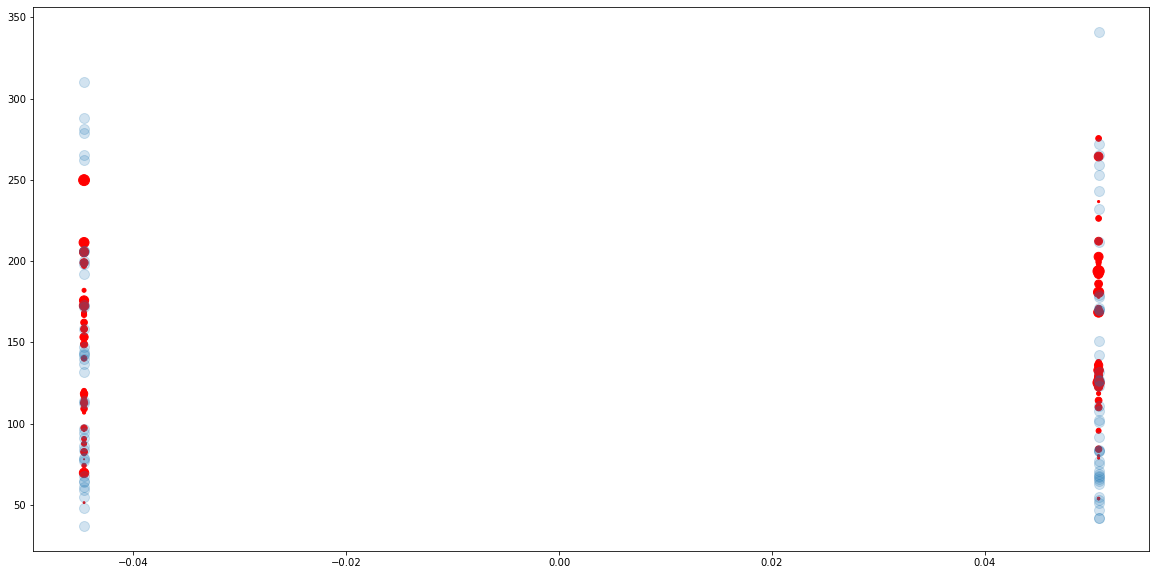

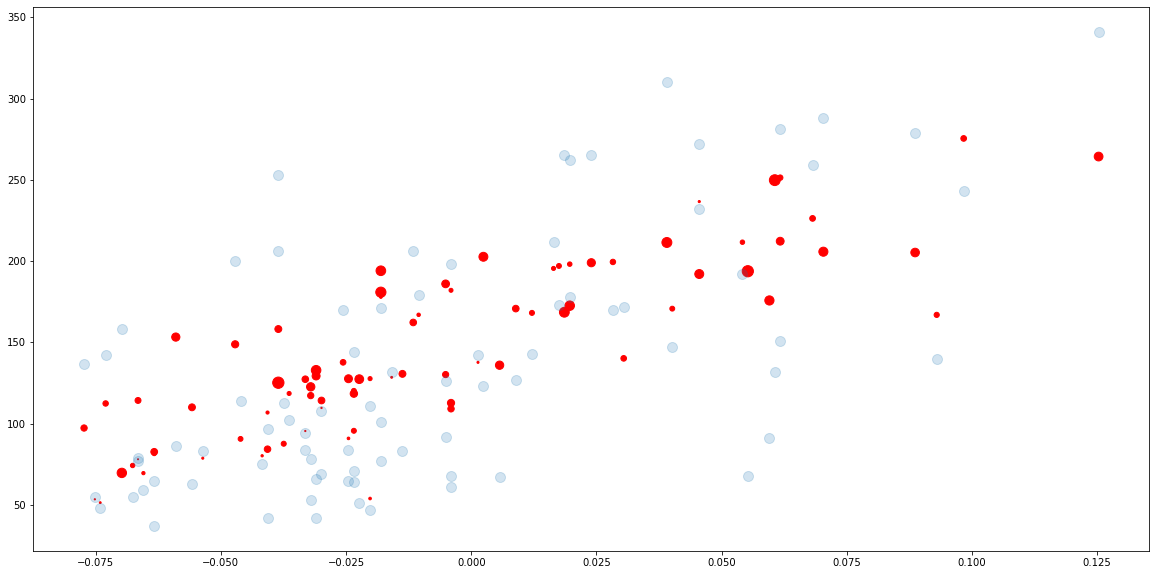

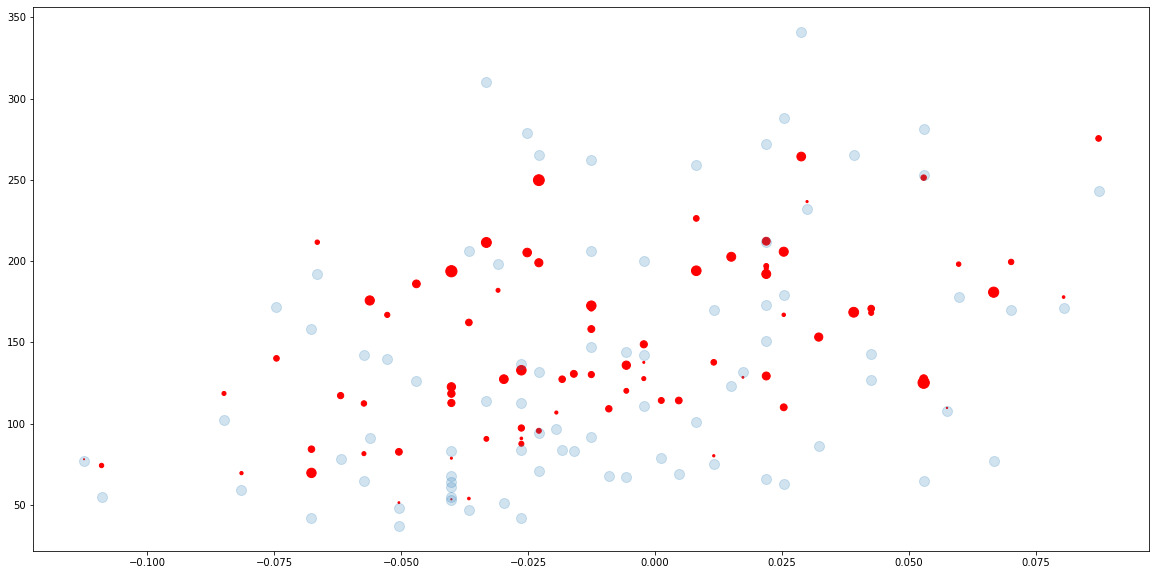

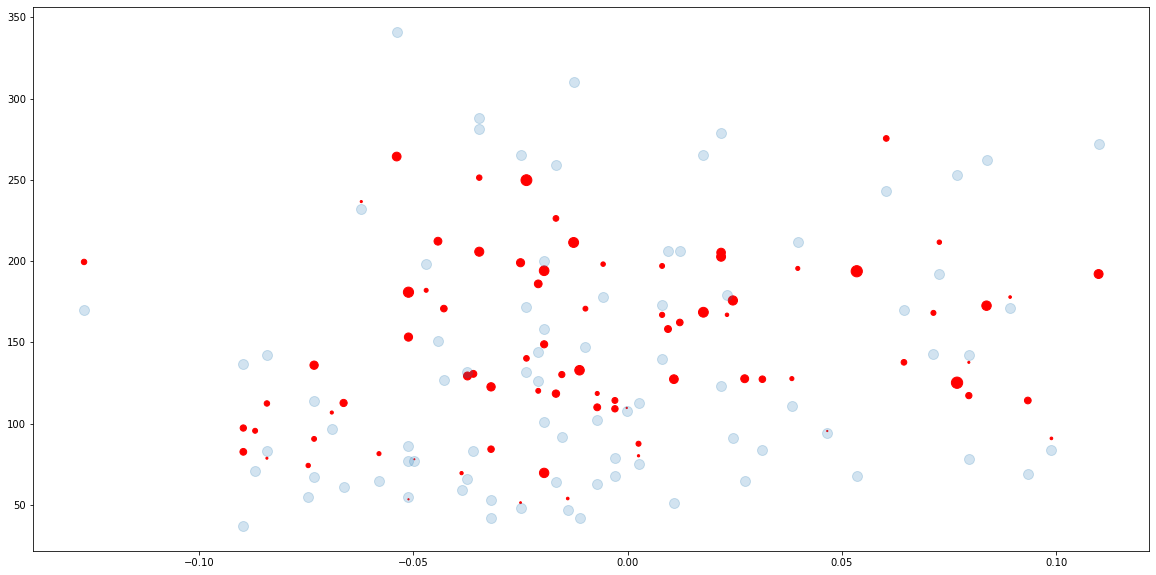

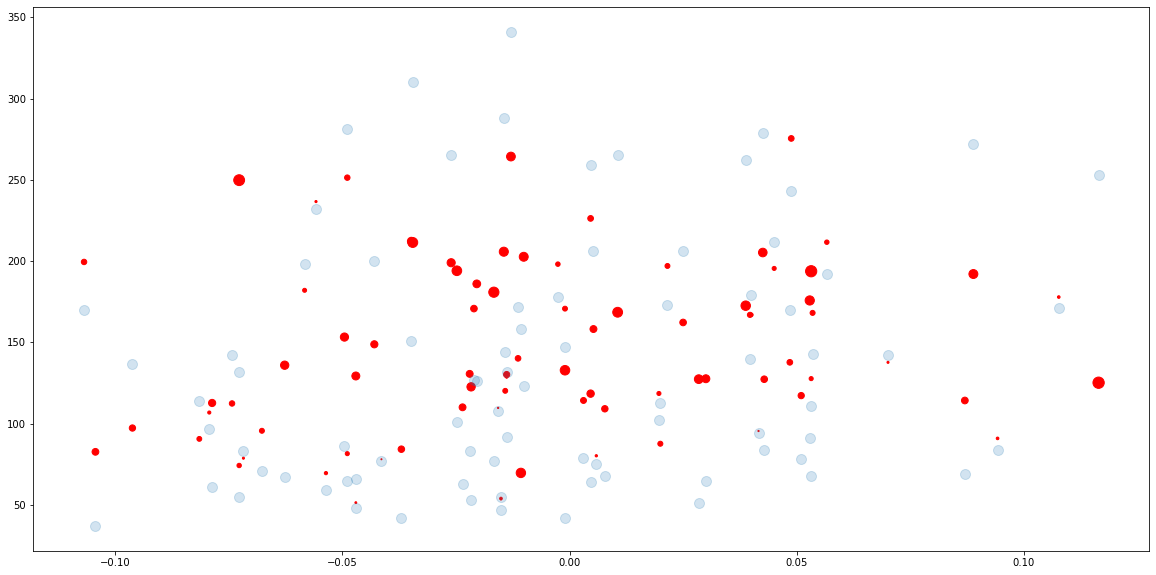

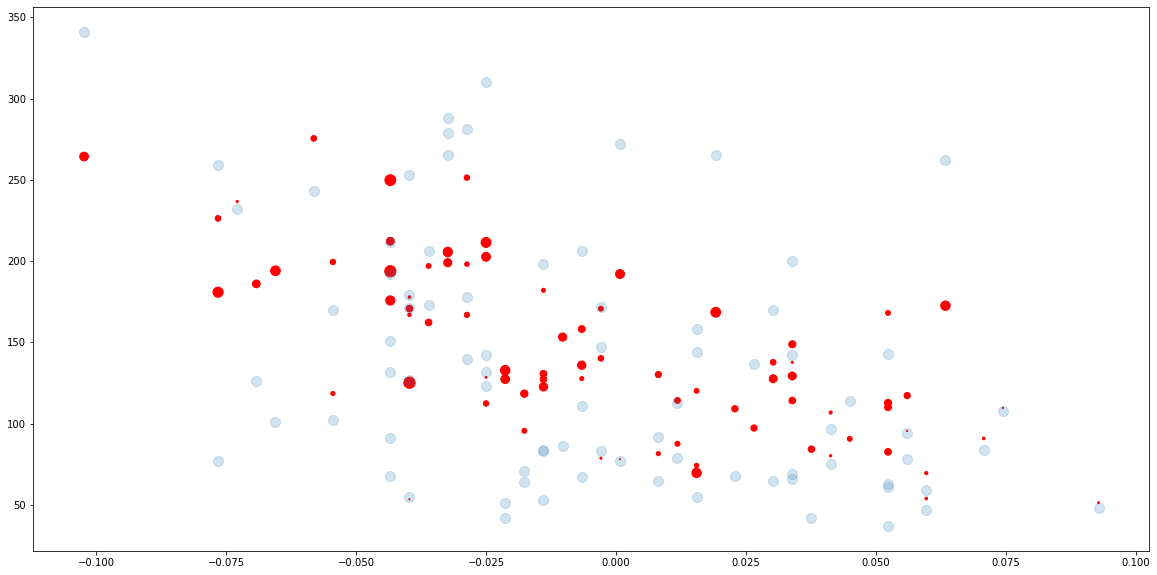

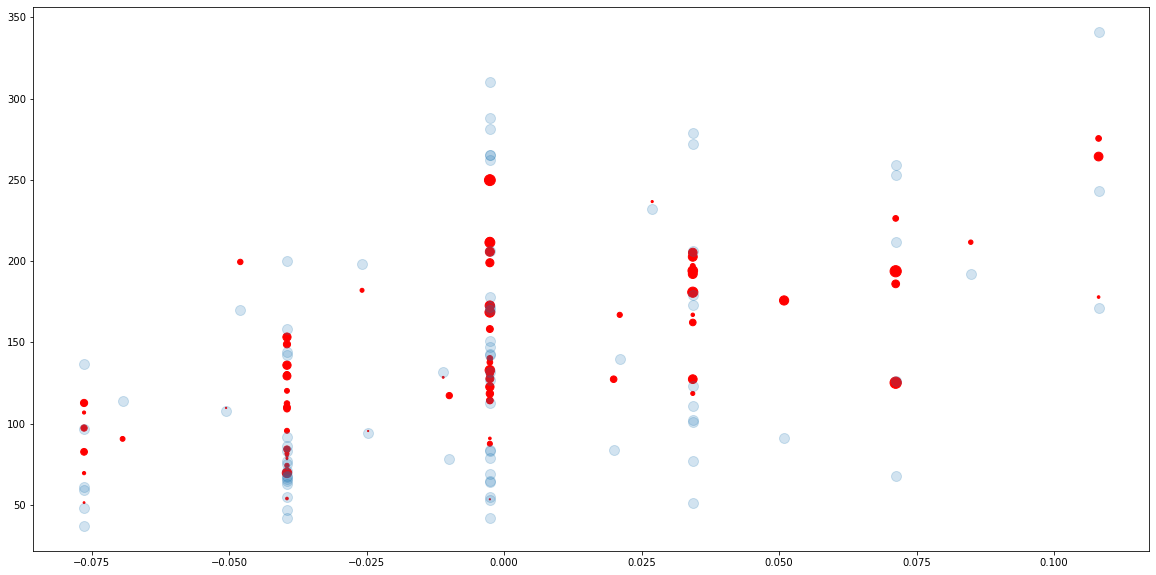

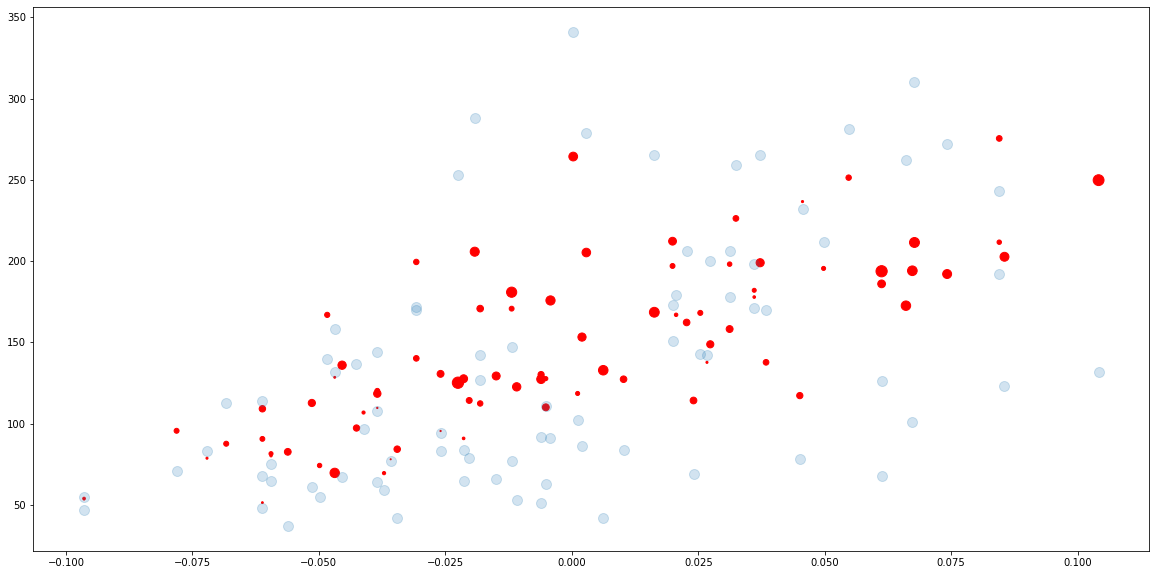

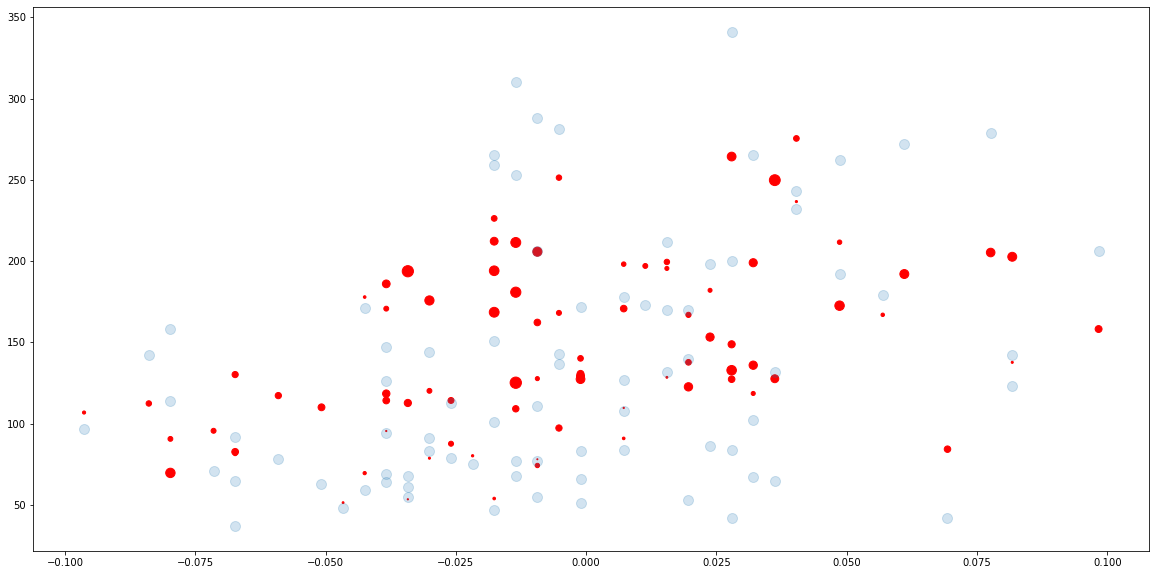

In [34]:
# _, axs = plt.subplots(n_axis, figsize=(15, 10))
for axid in range(n_axis):
    _ = plt.figure(figsize=(20, 10))
    plt.scatter(X_test[columns[axid]], y_test_pred, s=np.abs(y_test - y_test_pred), c='r')
    plt.scatter(X_test[columns[axid]], y_test, s=100, alpha=0.2)
    # plt.scatter(X_train[columns[axid]], , alpha=0.5, c='g')
    # axs[axid].scatter(X_train[columns[axid]], y_train_pred, c='r')
    # axs[axid].scatter(X_train[columns[axid]], y_train, alpha=0.2)
    plt.show()

In [35]:
large_corrs = []
for i in range(n_axis):
    print(f"Main column {columns[i]}")
    for j in range(n_axis):
        corr = df[columns[i]].corr(df[columns[j]])
        corr = round(corr, 2)
        print(f"..Correlation between {columns[i]} and {columns[j]} is {corr}")
        if (corr != 1) and (corr > 0.75 or corr < -0.75):
            large_corrs.append((columns[i], columns[j], corr))

Main column age
..Correlation between age and age is 1.0
..Correlation between age and sex is 0.18
..Correlation between age and bmi is 0.22
..Correlation between age and bp is 0.33
..Correlation between age and s1 is 0.27
..Correlation between age and s2 is 0.23
..Correlation between age and s3 is -0.09
..Correlation between age and s4 is 0.22
..Correlation between age and s5 is 0.26
..Correlation between age and s6 is 0.32
Main column sex
..Correlation between sex and age is 0.18
..Correlation between sex and sex is 1.0
..Correlation between sex and bmi is 0.07
..Correlation between sex and bp is 0.25
..Correlation between sex and s1 is 0.02
..Correlation between sex and s2 is 0.14
..Correlation between sex and s3 is -0.4
..Correlation between sex and s4 is 0.35
..Correlation between sex and s5 is 0.13
..Correlation between sex and s6 is 0.2
Main column bmi
..Correlation between bmi and age is 0.22
..Correlation between bmi and sex is 0.07
..Correlation between bmi and bmi is 1.0
..C

In [36]:
large_corrs

[('s1', 's2', 0.89), ('s2', 's1', 0.89)]

In [37]:
df2 = df.drop(columns=["s2", "s4"], axis=1)
df2 = df2[(df2 > -0.3) & (df2 < 0.3)]
X2 = df2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
r2 = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)
r2 = r2.fit(X2_train, y2_train)

In [39]:
y2_train_pred = r2.predict(X2_train)
y2_test_pred = r2.predict(X2_test)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse1 = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mse2 = mean_squared_error(y_true=y2_test, y_pred=y2_test_pred)
print(f"MSE1 = {mse1}. MSE2 = {mse2}")

MSE1 = 2902.8886767713707. MSE2 = 3339.595907957099
